# 实验二：基于回归分析的大学综合得分预测
---

## 1 案例简介
大学排名是一个非常重要同时也极富挑战性与争议性的问题，一所大学的综合实力涉及科研、师资、学生等方方面面。目前全球有上百家评估机构会评估大学的综合得分进行排序，而这些机构的打分也往往并不一致。在这些评分机构中，世界大学排名中心（Center for World University Rankings，缩写CWUR）以评估教育质量、校友就业、研究成果和引用，而非依赖于调查和大学所提交的数据著称，是非常有影响力的一个。

本任务中我们将根据 CWUR 所提供的世界各地知名大学各方面的排名（师资、科研等），一方面通过数据可视化的方式观察不同大学的特点，另一方面希望构建机器学习模型（线性回归）预测一所大学的综合得分。

## 2 作业说明
使用来自 Kaggle 的[数据](https://www.kaggle.com/mylesoneill/world-university-rankings?select=cwurData.csv)，构建「线性回归」模型，根据大学各项指标的排名预测综合得分。

**基本要求：**
* 按照 8:2 随机划分训练集测试集，用 RMSE 作为评价指标，得到测试集上线性回归模型的 RMSE 值；
* 对线性回归模型的系数进行分析。

**扩展要求：**
* 对数据进行观察与可视化，展示数据特点；
* 尝试其他的回归模型，对比效果；
* 尝试将离散的地区特征融入线性回归模型，并对结果进行对比。

**注意事项：**
* 基本输入特征有 8 个：`quality_of_education`, `alumni_employment`, `quality_of_faculty`, `publications`, `influence`, `citations`, `broad_impact`, `patents`；
* 预测目标为`score`；
* 可以使用 sklearn 等第三方库，不要求自己实现线性回归；
* 需要保留所有数据集生成、模型训练测试的代码；

## 3 数据概览

假设数据文件位于当前文件夹，我们用 pandas 读入标准 csv 格式文件的函数`read_csv()`将数据转换为`DataFrame`的形式。观察前几条数据记录：

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
RANDOM_SEED = 2023

data_df = pd.read_csv('./data/cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df.head(3).T  # 观察前几列并转置方便观察

,0,1,2
world_rank,1,2,3
institution,Harvard University,Massachusetts Institute of Technology,Stanford University
region,USA,USA,USA
national_rank,1,2,3
quality_of_education,7,9,17
alumni_employment,9,17,11
quality_of_faculty,1,3,5
publications,1,12,4
influence,1,4,2
citations,1,4,2


去除其中包含 NaN 的数据，保留 2000 条有效记录。

In [2]:
data_df = data_df.dropna()  # 舍去包含 NaN 的 row
len(data_df)

2000

取出对应自变量以及因变量的列，之后就可以基于此切分训练集和测试集，并进行模型构建与分析。

In [3]:
feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment', 
                'influence', 'quality_of_education', 'broad_impact', 'patents']
X = data_df[feature_cols]
Y = data_df['score']
X

,quality_of_faculty,publications,citations,alumni_employment,influence,quality_of_education,broad_impact,patents
200,1,1,1,1,1,1,1.0,2
201,4,5,3,2,3,11,4.0,6
202,2,15,2,11,2,3,2.0,1
203,5,10,12,10,9,2,13.0,48
204,10,11,11,12,12,7,12.0,16
...,...,...,...,...,...,...,...,...
2195,218,926,812,567,845,367,969.0,816
2196,218,997,645,566,908,236,981.0,871
2197,218,830,812,549,823,367,975.0,824
2198,218,886,812,567,974,367,975.0,651


## 4 模型构建

### 4.1 线性回归分析
1. 创建数据集

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_SEED)
X.shape, Y.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape # 输出数据行列信息

((2000, 8), (2000,), (1600, 8), (400, 8), (1600,), (400,))

2. 调用sklearn库函数，实现对模型的训练及测试

In [5]:
# 创建线性回归模型的实例
model = LinearRegression()
# 在训练集上训练
model.fit(x_train, y_train)
# 在测试集上测试
test_pre = model.predict(x_test)
# 计算RMSE
test_rmse = mean_squared_error(y_test,test_pre,squared = False)
print(f'rmse:{test_rmse}')

rmse:3.2634140694790297


3. 线性回归输出表达式

In [6]:
intercept = model.intercept_ # 获取模型的截距
coef = model.coef_ # 获取模型的斜率
equation = "y = " # 初始化方程的表达式
equation += f"{intercept:.4f}" # 添加截距，保留两位小数
for i, c in enumerate(coef): # 遍历系数
    if c >= 0: # 如果系数是正数
        equation += f" + {c:.4f} x_{i+1}" # 添加加号和系数，保留两位小数
    else: # 如果系数是负数
        equation += f" - {abs(c):.4f} x_{i+1}" # 添加减号和系数的绝对值，保留两位小数
print(equation)

y = 66.5284 - 0.0657 x_1 + 0.0003 x_2 - 0.0001 x_3 - 0.0075 x_4 + 0.0012 x_5 - 0.0068 x_6 - 0.0026 x_7 - 0.0027 x_8


4. 对线性回归模型的系数进行分析

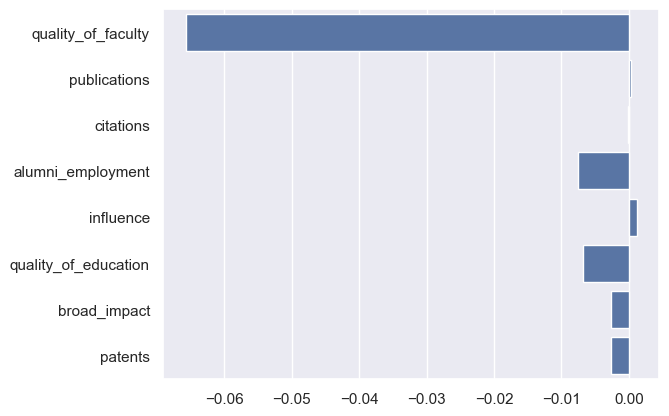

In [7]:
import seaborn as sns
# 图形化表示各个特征的系数
sns.set()
sns.barplot(x=model.coef_, y=feature_cols)
plt.show()

### 4.2 对数据进行观察与可视化

rmse:3.479517845901262


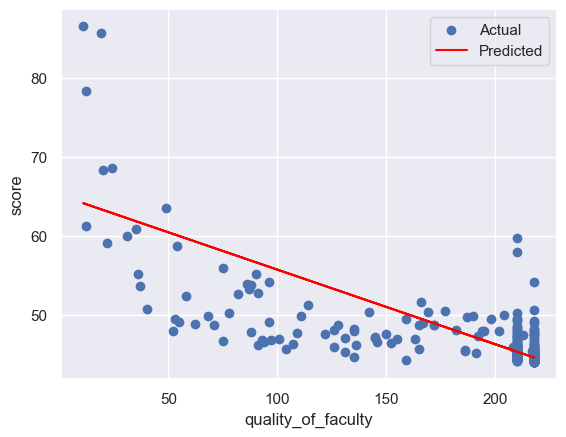

rmse:4.047968509911168


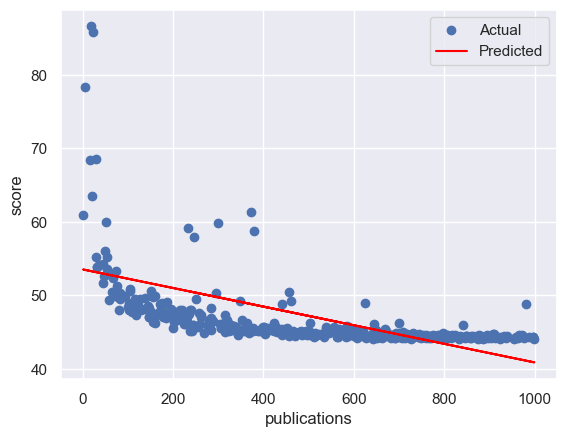

rmse:4.102669954218188


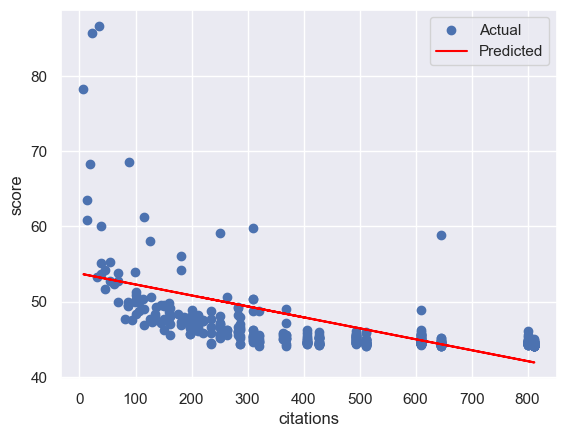

rmse:4.472523167437157


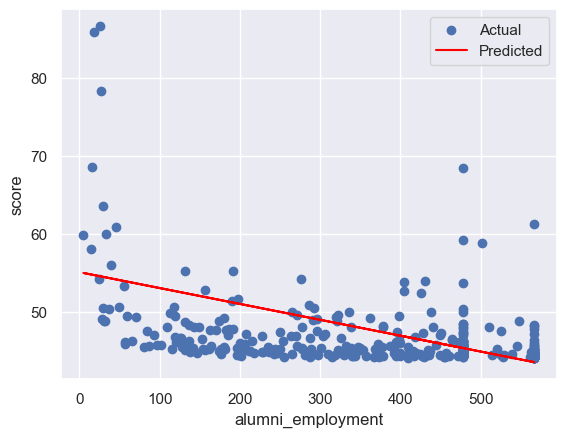

rmse:4.035630757829832


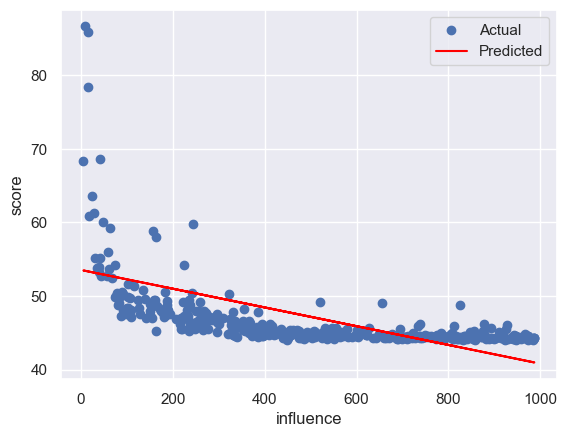

rmse:4.069221954219227


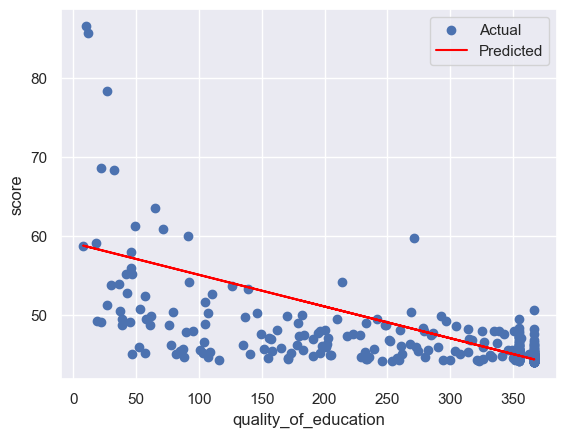

rmse:3.971682290643895


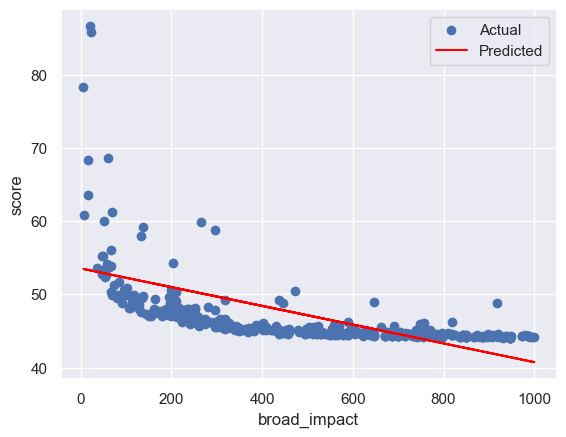

rmse:4.326078641382164


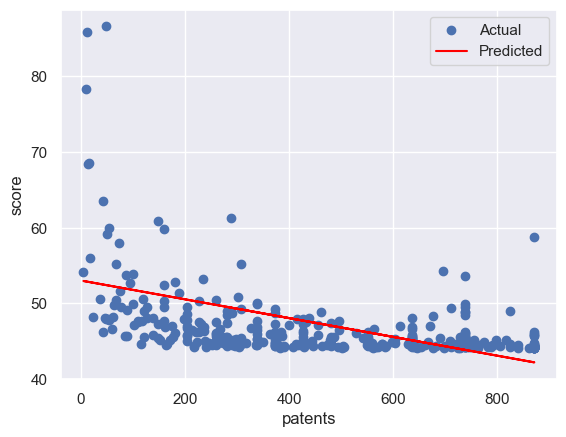

In [8]:
for col in feature_cols:
    # 划分训练集和测试集
    x_train, x_test, y_train, y_test = train_test_split(X[col].values.reshape(-1, 1), Y, test_size=0.2, random_state=RANDOM_SEED)

    # 创建一个线性回归模型的实例
    model = LinearRegression()
    
    # 使用训练集来拟合模型
    model.fit(x_train, y_train)
    
    # 使用测试集来评估模型的性能
    y_pre=model.predict(x_test)#预测
    rmse = mean_squared_error(y_test,y_pre,squared = False)
    print(f'rmse:{rmse}')
    
    # 可视化模型的结果
    plt.scatter(x_test, y_test, label='Actual') # 绘制测试集的散点图，表示实际的因变量值
    plt.plot(x_test, y_pre, color='red', label='Predicted') # 绘制测试集的折线图，表示预测的因变量值
    plt.xlabel(col) # 设置 x 轴的标签
    plt.ylabel('score') # 设置 y 轴的标签
    plt.legend() # 显示图例
    plt.show() # 显示图形

### 4.3 离散的地区特征

> 尝试将离散的地区特征融入线性回归模型，并对结果进行对比

选择将离散的地区特征，按其各自的数量作为其值进行数据化

1. 查看地区的唯一值

In [9]:
data_df['region'].unique()

array(['USA', 'United Kingdom', 'Japan', 'Switzerland', 'Israel',
       'South Korea', 'Canada', 'France', 'Russia', 'China', 'Taiwan',
       'Sweden', 'Singapore', 'Denmark', 'Germany', 'Netherlands',
       'Italy', 'Belgium', 'Australia', 'Finland', 'Norway',
       'South Africa', 'Spain', 'Brazil', 'Hong Kong', 'Ireland',
       'Austria', 'New Zealand', 'Portugal', 'Thailand', 'Czech Republic',
       'Malaysia', 'India', 'Greece', 'Mexico', 'Hungary', 'Argentina',
       'Turkey', 'Poland', 'Saudi Arabia', 'Chile', 'Iceland', 'Slovenia',
       'Estonia', 'Lebanon', 'Croatia', 'Colombia', 'Slovak Republic',
       'Iran', 'Egypt', 'Serbia', 'Bulgaria', 'Lithuania', 'Uganda',
       'United Arab Emirates', 'Uruguay', 'Cyprus', 'Romania',
       'Puerto Rico'], dtype=object)

2. 根据数据集中地区数量进行赋值

In [10]:
region_counts = data_df['region'].value_counts() # 计算每个地区的数量
print(region_counts) # 打印结果

USA                     458
China                   167
Japan                   148
United Kingdom          129
Germany                 110
France                   99
Italy                    94
Spain                    81
South Korea              70
Canada                   65
Australia                54
Taiwan                   46
Brazil                   36
India                    31
Netherlands              26
Austria                  24
Sweden                   22
Turkey                   20
Belgium                  20
Finland                  18
Poland                   18
Switzerland              18
Iran                     16
Ireland                  16
Greece                   14
Portugal                 14
Israel                   14
Hungary                  12
Hong Kong                12
New Zealand              12
Norway                   10
Czech Republic           10
South Africa             10
Denmark                  10
Egypt                     8
Chile               

3. 创建新的数据集

   在原有的X数据集中加入region_count列

In [11]:
X_plus = X.assign(region = data_df.region)
X_plus

,quality_of_faculty,publications,citations,alumni_employment,influence,quality_of_education,broad_impact,patents,region
200,1,1,1,1,1,1,1.0,2,USA
201,4,5,3,2,3,11,4.0,6,USA
202,2,15,2,11,2,3,2.0,1,USA
203,5,10,12,10,9,2,13.0,48,United Kingdom
204,10,11,11,12,12,7,12.0,16,United Kingdom
...,...,...,...,...,...,...,...,...,...
2195,218,926,812,567,845,367,969.0,816,Portugal
2196,218,997,645,566,908,236,981.0,871,Egypt
2197,218,830,812,549,823,367,975.0,824,Brazil
2198,218,886,812,567,974,367,975.0,651,Spain


In [12]:
region_counts = pd.DataFrame(region_counts)
region_counts.rename(columns ={'count':'region_count'},inplace=True)
X_plus = X_plus.join(region_counts, on='region', rsuffix='_count')
X_plus.drop('region', axis=1, inplace=True)
X_plus

,quality_of_faculty,publications,citations,alumni_employment,influence,quality_of_education,broad_impact,patents,region_count
200,1,1,1,1,1,1,1.0,2,458
201,4,5,3,2,3,11,4.0,6,458
202,2,15,2,11,2,3,2.0,1,458
203,5,10,12,10,9,2,13.0,48,129
204,10,11,11,12,12,7,12.0,16,129
...,...,...,...,...,...,...,...,...,...
2195,218,926,812,567,845,367,969.0,816,14
2196,218,997,645,566,908,236,981.0,871,8
2197,218,830,812,549,823,367,975.0,824,36
2198,218,886,812,567,974,367,975.0,651,81


4. 训练数据集，并进行测试，绘制基于region_count的图像

rmse:3.2114437773064073
y = 65.9558 - 0.0652 x_1 - 0.0005 x_2 + 0.0001 x_3 - 0.0072 x_4 + 0.0014 x_5 - 0.0069 x_6 - 0.0022 x_7 - 0.0025 x_8 + 0.0017 x_9


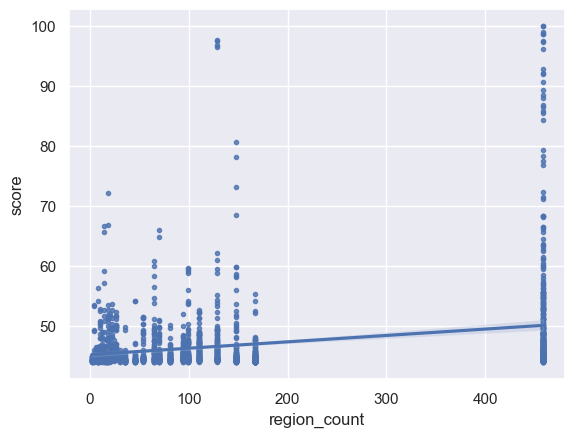

In [13]:
# 创建数据集
x_train, x_test, y_train, y_test = train_test_split(X_plus, Y, test_size=0.2, random_state=RANDOM_SEED)
X.shape, Y.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape # 输出数据行列信息

# 创建线性回归模型的实例
model = LinearRegression()
# 在训练集上训练
model.fit(x_train, y_train)
# 在测试集上测试
test_pre = model.predict(x_test)
# 计算RMSE
test_rmse = mean_squared_error(y_test,test_pre,squared = False)
print(f'rmse:{test_rmse}')

# 计算表达式
intercept = model.intercept_ # 获取模型的截距
coef = model.coef_ # 获取模型的斜率
equation = "y = " # 初始化方程的表达式
equation += f"{intercept:.4f}" # 添加截距，保留两位小数
for i, c in enumerate(coef): # 遍历系数
    if c >= 0: # 如果系数是正数
        equation += f" + {c:.4f} x_{i+1}" # 添加加号和系数，保留两位小数
    else: # 如果系数是负数
        equation += f" - {abs(c):.4f} x_{i+1}" # 添加减号和系数的绝对值，保留两位小数
print(equation)

# 绘制region_count图像
sns.regplot(x=X_plus['region_count'], y=Y, marker=".")
plt.show()

相比与未加入地区数据集，rmse有所降低，模型更好

### 4.4 尝试使用多项式回归模型

通过调用sklearn库中`preprocessing`与`pipeline`函数，实现多项式回归，并进行可视化分析

Equation: y = 89.02454 + -0.97067x + 0.00718x^2 + -0.00002x^3
rmse:2.5425



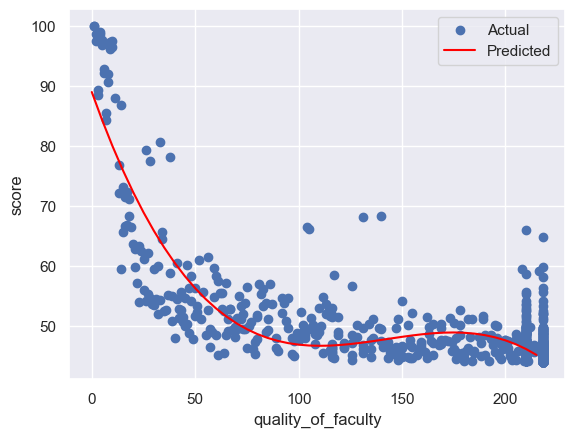

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X['quality_of_faculty'].values.reshape(-1, 1), Y, test_size=0.2, random_state=RANDOM_SEED)

# 生成多项式特征，这里指定最高次数为 3
poly = PolynomialFeatures(degree=3)

# 创建线性回归模型的实例
model = LinearRegression()

# 创建管道，将多项式特征的转换器和线性回归模型连接起来
pipeline = make_pipeline(poly, model)

# 使用数据拟合管道
pipeline.fit(x_train, y_train)

# 获取模型的系数和截距
coef = pipeline.named_steps['linearregression'].coef_
intercept = pipeline.named_steps['linearregression'].intercept_
print(f'Equation: y = {intercept:.5f} + {coef[1]:.5f}x + {coef[2]:.5f}x^2 + {coef[3]:.5f}x^3') # 打印模型的方程，保留两位小数

# 使用管道预测新的数据
y_pre = pipeline.predict(x_test) # 新的因变量

# 计算RMSE
test_rmse = mean_squared_error(y_test,y_pre,squared = False)
print(f'rmse:{test_rmse:.4f}')
print()

# 使用 matplotlib 库绘制模型的图形
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, label='Actual') # 绘制原始数据的散点图，表示实际的因变量值
x_new = np.arange(0, 220, 5).reshape((-1, 1)) # 新的自变量
y_new = pipeline.predict(x_new) # 新的因变量
plt.plot(x_new, y_new, color='red', label='Predicted') # 绘制新数据的折线图，表示预测的因变量值
plt.xlabel('quality_of_faculty') # 设置 x 轴的标签
plt.ylabel('score') # 设置 y 轴的标签
plt.legend() # 显示图例
plt.show() # 显示图形

通过使用3次方多项式进行回归分析，明显可以看到曲线更加贴合数据，rmse也明显降低

### 4.5 尝试使用对数回归模型
对输入和输出变量进行对数变换，然后执行多项式回归分析，并最后在图中反变换对数结果以展示原始数据

Equation: log(y) = 4.65827 + 0.00332logx + -0.07870(logx)^2 + 0.00910(logx)^3
rmse:0.0448



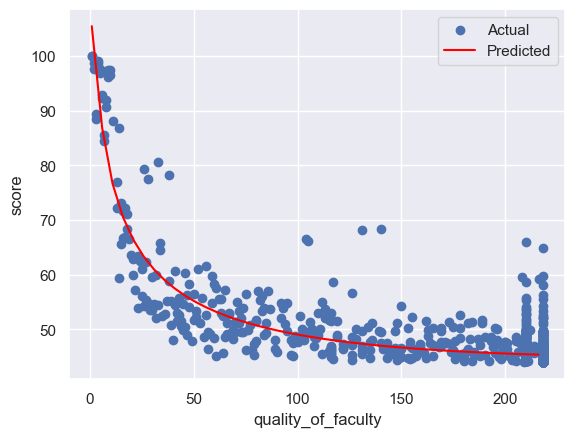

In [15]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 对输入和输出变量进行对数变换，处理非正数值
x_log = np.log(np.maximum(X['quality_of_faculty'].values.reshape(-1, 1), 1e-10))
y_log = np.log(np.maximum(Y, 1e-10))

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x_log, y_log, test_size=0.2, random_state=RANDOM_SEED)

# 生成多项式特征，这里指定最高次数为 3
poly = PolynomialFeatures(degree=3)

# 创建线性回归模型的实例
model = LinearRegression()

# 创建管道，将多项式特征的转换器和线性回归模型连接起来
pipeline = make_pipeline(poly, model)

# 使用数据拟合管道
pipeline.fit(x_train, y_train)

# 获取模型的系数和截距
coef = pipeline.named_steps['linearregression'].coef_
intercept = pipeline.named_steps['linearregression'].intercept_
print(f'Equation: log(y) = {intercept:.5f} + {coef[1]:.5f}logx + {coef[2]:.5f}(logx)^2 + {coef[3]:.5f}(logx)^3') # 打印模型的方程，保留两位小数

# 使用管道预测新的数据
y_pre = pipeline.predict(x_test) # 新的对数因变量

# 计算RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_pre))
print(f'rmse:{test_rmse:.4f}')
print()

# 使用 matplotlib 库绘制模型的图形
import matplotlib.pyplot as plt
plt.scatter(np.exp(x_train), np.exp(y_train), label='Actual') # 绘制原始数据的散点图，表示实际的因变量值（需要对数反变换）
x_new = np.arange(1, 220, 5).reshape((-1, 1))  # 新的自变量
x_new = np.maximum(x_new, 1e-10)  # 替换零值为一个很小的正数
y_new = np.exp(pipeline.predict(np.log(x_new)))  # 新的对数因变量
plt.plot(x_new, y_new, color='red', label='Predicted') # 绘制新数据的折线图，表示预测的因变量值（需要对数反变换）
plt.xlabel('quality_of_faculty') # 设置 x 轴的标签
plt.ylabel('score') # 设置 y 轴的标签
plt.legend() # 显示图例
plt.show() # 显示图形
